In [1]:
#pip install jieba 安裝中文結巴用套件
#pip install openai 安裝調用ChatGPT用套件
#!pip install wordcloud 安裝繪製文字雲用套件
#本來，我想要透過爬蟲直接將Youtube上的字幕檔爬下來，但是我發現無論是pytube還是tube-dl套件都不安全
#原因是因為Youtube平台平均每幾個月就會大改其網頁格式，這會導致套件大量失效，而我這work我在實現之後
#應該不會持續更新維護，所以我放棄直接透過第三方軟體下載字幕檔的方式實現我想要的工作。
#另外其實還有一個解決思路，那就是YouTube Data API，但這需要Google開發人員權限，但追根究柢還是要錢……

In [2]:
import openai
import pandas as pd
import jieba
import jieba.analyse
import numpy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [3]:
keyfile = open("key.txt", "r")
key = keyfile.readline()
openai.api_key = key

In [4]:
def chatgptfn(sub_list):
    result = ''
    print(sub_list)
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "你是一個視頻工作者的文字編輯"},
            {"role": "user", "content": f"{sub_list} :請基於這些文字，書寫簡單的繁體中文摘要"}
        ]
    )
    for choice in response.choices:
        result += choice.message.content
    return result

In [5]:
with open('text1.txt', 'r', encoding="utf-8") as fh:
    tmp = fh.read()
    itemlist1 = tmp.split(',')
with open('text2.txt', 'r', encoding="utf-8") as fh: #注意這裡不加UTF-8會error
    tmp = fh.read()
    itemlist2 = tmp.split(',')
itemlist1 = str(itemlist1)
itemlist2 = str(itemlist2)

In [6]:
data1 = [itemlist1[0:1000], itemlist1[1001:2000], 
        itemlist1[2001:3000], itemlist1[3001:4000], itemlist1[4001:5000], itemlist1[5001:6000]]

In [7]:
data2 = [itemlist2[0:1000], itemlist2[1001:2000], 
        itemlist2[2001:3000], itemlist2[3001:4000], itemlist2[4001:5000], itemlist2[5001:6000]]

In [8]:
#for i in range(0,6):
#    data1[i] = chatgptfn(data1[i])

#這裡我嘗試過用GPT來轉換，偶爾成功、但超頻繁的遇到崩潰的狀況，我猜如果我換成付費版帳號應該可以順利執行
#但無論如何，我就暫時不用摘要進行分析了，雖然確實很猛，無法執行就沒救……

In [9]:
with open('text1.txt', 'r', encoding="utf-8") as fh:
    tmp = fh.read()
    itemlist1 = tmp.replace('\n', '')
with open('text2.txt', 'r', encoding="utf-8") as fh:
    tmp = fh.read()
    itemlist2 = tmp.replace('\n', '')
with open('text3.txt', 'r', encoding="utf-8") as fh:
    tmp = fh.read()
    itemlist3 = tmp.replace('\n', '')
with open('text4.txt', 'r', encoding="utf-8") as fh:
    tmp = fh.read()
    itemlist4 = tmp.replace('\n', '')
total_text = itemlist1+itemlist2+itemlist3+itemlist4

In [10]:
#斷詞之後的全文本
words = jieba.cut(total_text) 
#print("|".join(seg_list))
#上面一行可顯示斷詞後的結果

In [11]:
# 將斷詞結果轉換為字串
words_str = ' '.join(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wayan\AppData\Local\Temp\jieba.cache
Loading model cost 0.261 seconds.
Prefix dict has been built successfully.


In [12]:
# 使用 wordcloud 套件繪製文字雲
wordcloud = WordCloud(font_path='msjh.ttc', width=800, height=600, background_color='white').generate(words_str)

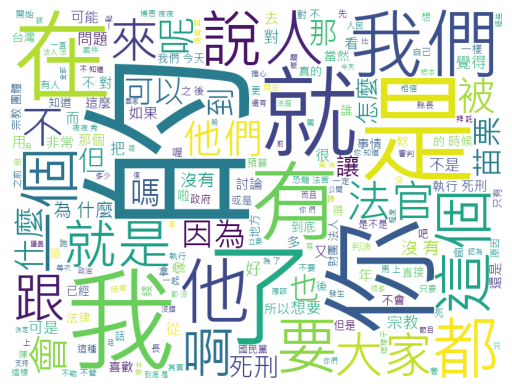

In [13]:
# 顯示文字雲
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#理論上，應該要再加上一些停用詞，但我這裡認為，我們的重點在於博恩說話時的用語與口條，因此設了停用詞，反而一些用語會看不到了。